# Mapamundi correlaciones

C:\Users\juanc\AppData\Local\Temp\ipykernel_20668\3334391754.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


<Axes: >

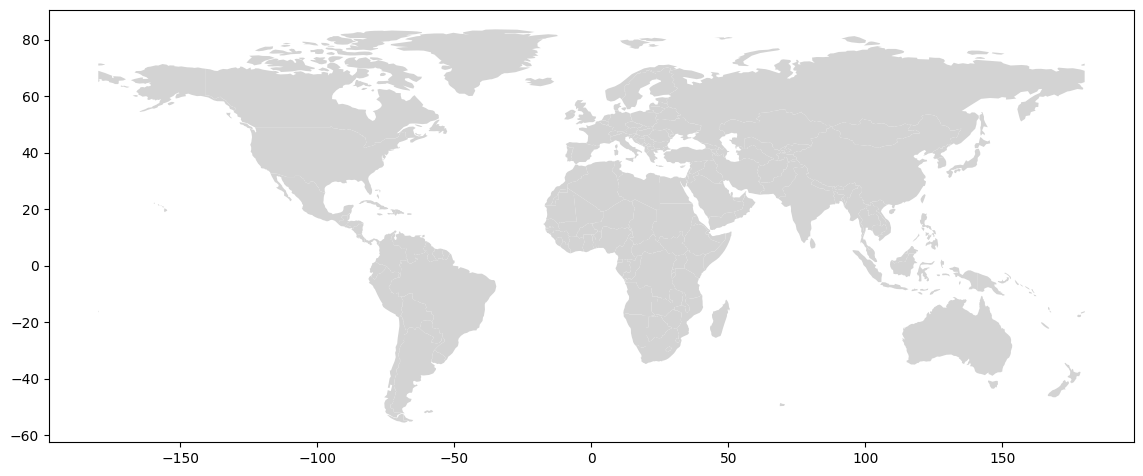

In [1]:
import geopandas
import matplotlib.pyplot as plt
import numpy as np

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[(world.name!="Antarctica")]

# Prepare the map
fig, ax = plt.subplots(figsize=(14, 10))
world.plot(ax=ax, color='lightgrey')


In [26]:
import pandas as pd

# Load the data into a DataFrame
df = pd.read_csv("Df_Correlacion.csv", sep=";", encoding="utf-8")
df.rename(columns={"Unnamed: 0": "Nacionalidad"}, inplace=True)

import pycountry
# Function to convert Spanish country names to ISO_A3 codes
def get_iso_code(name):
    try:
        country = pycountry.countries.lookup(name)
        return country.alpha_3  # ISO_A3 Code
    except LookupError:
        return None

# Add ISO codes to the dataset
data['ISO_A3'] = data['Pais'].apply(get_iso_code)

df

ModuleNotFoundError: No module named 'pycountry'

In [18]:
# Merge your data with the world GeoDataFrame
# Ensure the 'Pais' column in your data matches the 'name' column in the world dataset
world_data = world.merge(df, left_on='name', right_on='Nacionalidad', how='left')

world_data

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Nacionalidad,Construccion,Industria,Primario,Servicios
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN,NaN
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN,NaN,NaN
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",NaN,NaN,NaN,NaN,NaN
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
171,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia,0.271657,-0.275783,0.068979,0.150642
172,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN,NaN,NaN,NaN,NaN
173,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,NaN,NaN,NaN
174,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN,NaN,NaN,NaN,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

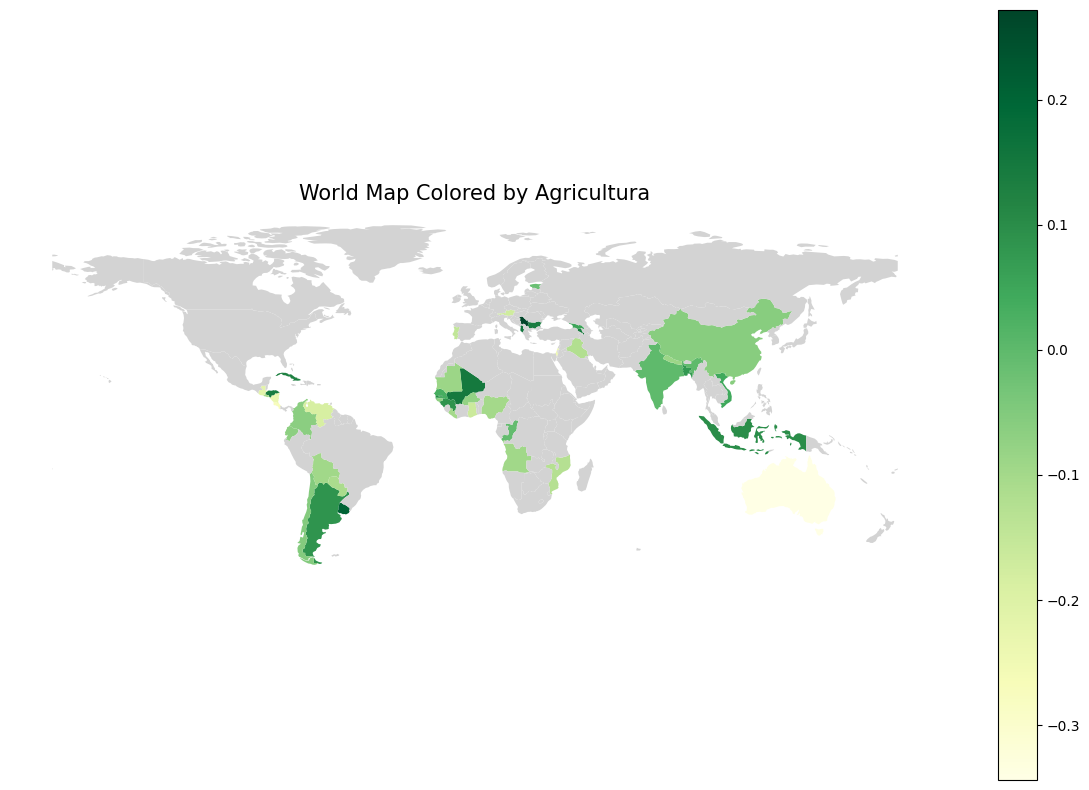

In [25]:

# Plot the world map with colors based on the 'Agricultura' column
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world_data.plot(
    column='Construccion',  # Use the Agricultura column to color countries
    cmap='YlGn',          # Colormap (e.g., 'YlGn', 'viridis', etc.)
    legend=True,          # Show a legend
    missing_kwds={
        "color": "lightgrey",  # Color for countries without data
        "label": "No Data",
    },
    ax=ax
)

# Add title and other map features
ax.set_title('World Map Colored by Agricultura', fontsize=15)
ax.axis('off')  # Turn off axis

# Show the map
plt.show